<!--# STAT 207: Data Science Exploration-->

# <u> Unit 10 Notebook</u>: Introduction to Inference – Hypothesis Testing for Population Means (µ) and Population Proportions (p)

## <u>Case Study</u> Pew Survey Analysis 1
Is there sufficient evidence to suggest that the average age of an adult living in the U.S (in 2017) is NOT equal to 50?

## <u>Case Study</u> Pew Survey Analysis 2
Is there sufficient evidence to suggest that the proportion of adults living in the U.S. that approve of the way things are going in the country (in 2017) is NOT equal to 0.75?


<hr style="height:1px;border:none;color:#333;background-color:#333;" />

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

## 1. Two Main Types of Inference for Unknown Population Parameters

#### See Unit 10 slides (section 1)

## 2. Frequentist Hypothesis Testing - Like a Court Case

#### See Unit 10 slides (section 2)

## 3. Ways to Conduct Frequentist Hypothesis Testing about a Large Unknown Population

#### See Unit 10 slides (section 3)

## 4. Properties of Sampling Distributions of Sample Means

#### See Unit 10 slides (section 4)

## 5. General Frequentist Hypothesis Testing - Using p-values

#### See Unit 10 slides (section 5)

## 6. Frequentist Hypothesis Testing for a Population Mean $\mu$ - Using p-values - Preliminary Example - Intuition

#### See Unit 10 slides (section 6)

**Ex:** Suppose that in 2007 the average age of all adults living in the U.S. was thought to have been 50. In 2017, researchers are skeptical that that is still the case. We would like to conduct hypothesis testing to test these claims. 
So in 2017, we collect a random sample of size 1489 with an average of 50.49 years and a standard deviation of 17.84 years. Suppose we also know that the standard deviation of ALL adults living in the U.S. in 2017 is σ=18.





### 6.0 Preliminary Dataset Cleaning and Inspection
The February 2017 Pew Research Center random phone number dialing survey had 1,503 respondents in total.

First, let's learn a little more about this dataset.

In [2]:
# Read in the data
missing_values = ["NaN", "nan", "Don't know/Refused (VOL.)"]
df_pew = pd.read_csv('Feb17public.csv', 
                   na_values=missing_values)
df_pew.head()

,psraid,sample,int_date,fcall,version,attempts,refusal,ilang,cregion,state,...,ql1a,qc1,money2,money3,iphoneuse,hphoneuse,ll,cp,cellweight,weight
0,100008,Landline,21017,170207,Client changes,4,No,English,Midwest,Illinois,...,NaN,NaN,NaN,NaN,Dual,Dual HH,1,1,NaN,1.733333
1,100019,Landline,21217,170207,Client changes,4,Yes,English,South,North Carolina,...,NaN,NaN,NaN,NaN,Dual,Dual HH,1,1,NaN,1.500000
2,100020,Landline,21217,170207,Client changes,4,Yes,English,Northeast,New York,...,NaN,NaN,NaN,NaN,Dual,Dual HH,1,1,NaN,1.533333
3,100021,Landline,20717,170207,Initial version,1,No,English,Midwest,Minnesota,...,NaN,NaN,NaN,NaN,Dual,Dual HH,1,1,NaN,5.866667
4,100024,Landline,20717,170207,Initial version,1,No,English,Midwest,Illinois,...,NaN,NaN,NaN,NaN,Dual,Dual HH,1,1,NaN,1.700000


#### What is the shape of this dataset?

In [3]:
df_pew.shape

(1503, 130)

#### Let's create a pandas series that is just the the age column of this dataframe and drop the missing values from this series.


In [4]:
df_pew_age=df_pew['age'].dropna()
df_pew_age

0       80.0
1       70.0
2       69.0
3       50.0
4       70.0
        ... 
1498    37.0
1499    30.0
1500    72.0
1501    67.0
1502    35.0
Name: age, Length: 1489, dtype: float64

#### What is the shape of this series?

In [5]:
df_pew_age.shape

(1489,)

#### Collecting Sample Information

In [6]:
# compute and display sample statistics
sample_mean_age = df_pew_age.mean()
sample_std_age = df_pew_age.std()
n_age = df_pew_age.shape[0]
print('sample mean age=', round(sample_mean_age, 2), 
      'sample std age=', round(sample_std_age,2), 
      'sample size n=', n_age)

pop_std_age=18

print('popuolation standard deviation age=',pop_std_age) 

sample mean age= 50.49 sample std age= 17.84 sample size n= 1489
popuolation standard deviation age= 18


#### Sample Distribution Shape

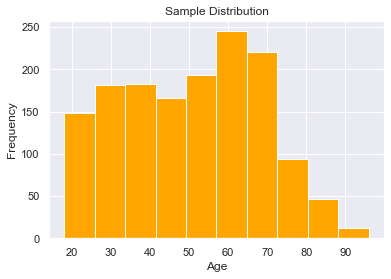

In [7]:
df_pew_age.hist(color='orange')
plt.title('Sample Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

### 6.1. Set up your hypotheses for this test.

$H_0: \mu=50$.

$H_A: \mu\neq 50$.

Where $\mu=$ the mean age of ALL adults living in the U.S. in 2017.


### 6.2. Are the Central Limit Theorem Conditions (for Sample Means) met by this example?

Yes, the Central Limit Theorem Conditions (for Sample Means) below are met by this sample.

1. <u>Condition: The observations are independent</u>.
    - Because the sample is collected via random sampling and $n<10\%$ of the population of ALL adults living in the U.S.
2. <u>Condition: Either n>30 OR the population distribution is normal.</u>.
    - It looks like the population distribution of ages is NOT normal. How do we know?
        - The sample distribution and the population distribution tend to mirror each other.
        - The sample distribution above is NOT symmetric and unimodal, therefore, it is not a good assumption to say that it is normal.
    - However, because our sample size $n=1489>30$,this condition is met.


### 6.3 If so, describe what we know about the sampling distribution of sample means (of random samples of size n=1489) so far. Describe what we know about the distribution of z-scores of the sample means in our sampling distribution so far.

<u>Sampling Distribution Information We KNOW So Far</u>:
* Because the the Central Limit Theorem conditions (for sample means) holds, this means that the **sampling distribution of sample means** (collected from random samples of size n=1489) is approximately normal.
* We also (for now) can assume that we know the **standard deviation of the sampling distribution (of sample means)** (ie. the **standard error**) which is: $\frac{\sigma}{\sqrt{n}}=\frac{18}{\sqrt{1489}}=0.466$.

**To summarize, we know: $\bar{X}\sim N(mean=\mu=?, stddev=\frac{\sigma}{\sqrt{n}}=\frac{18}{\sqrt{1489}}=0.466)$**

<br/>
<br/>
<br/>
<br/>
<br/>
<br/>
<br/>
<br/>
<br/>
<br/>
<br/>
<br/>
<br/>
<br/>
<br/>
<br/>
<br/>


<u>Sampling Distribution Information We DON'T KNOW YET</u>:
* While we know that the **mean of the sampling distribution (of sample means)** is $\mu$, because we are conducting inference on $\mu$, we don't actually know what this is.

<u>Information We KNOW So Far About the Z-scores of the Sample Means in the Sampling Distribution</u>:
* If we let $Z=\frac{\bar{X}-E[\bar{X}]}{SD[\bar{X}]} =\frac{\bar{X}-\mu}{\frac{\sigma}{\sqrt{n}}}$, then because $\bar{X}$ is a normal random variable, then $Z$ is a standard normal random variable (ie. $Z\sim N(mean=0, std=1)$).

<br/>
<br/>
<br/>
<br/>
<br/>
<br/>
<br/>
<br/>
<br/>
<br/>
<br/>
<br/>
<br/>
<br/>
<br/>
<br/>
<br/>

### 6.4. If we assume the null hypothesis is true, what other information can we add/assume about our sampling distribution of sample means (of random samples of size n=1489) so far?

<u>Sampling Distribution Information We KNOW So Far (or ASSUME)</u>:
* We can also now ASSUME that we know the **mean of the sampling distribution (of sample means)** to be $\mu=50$.

**To summarize, we know or ASSUME: $\bar{X}\sim N(mean=\mu=50, stddev=\frac{\sigma}{\sqrt{n}}=\frac{18}{\sqrt{1489}}=0.466)$**

<br/>
<br/>
<br/>
<br/>
<br/>
<br/>
<br/>
<br/>
<br/>
<br/>
<br/>
<br/>
<br/>
<br/>
<br/>
<br/>
<br/>

### 6.5 What types of sample means would make us “suspicious” that our alternative hypothesis is true?

<br/>
<br/>
<br/>
<br/>
<br/>
<br/>
<br/>
<br/>
<br/>
<br/>
<br/>
<br/>
<br/>
<br/>
<br/>
<br/>
<br/>

### 6.6 Calculate the p-value for this hypothesis test.

p-value = P(sample statistic that is at least as suspicious (in favor of the alternative hypothesis) as the observed sample statistic | null hypothesis is true)

 = P(sample MEAN that is at least as suspicious (in favor of the alternative hypothesis) as $\bar{x}_0=50.49$ | null hypothesis is true)
 
  = $P(\bar{X}\geq 50.49\: OR \: \bar{X}\leq 49.51)$ (Assuming $H_0: \mu=50$)
  
  = $P(\bar{X}\geq 50.49) + P(\bar{X}\leq 49.51)$ (Assuming $H_0: \mu=50$)
  
   = $2P(\bar{X}\geq 50.49)$ (Assuming $H_0: \mu=50$)
   
   =0.29
   
<br/>
<br/>
<br/>
<br/>
<br/>
<br/>
<br/>
<br/>
<br/>
<br/>
<br/>
<br/>
<br/>
<br/>
<br/>
<br/>
<br/>
<br/>
<br/>
<br/>
<br/>
<br/>

In [8]:
from scipy.stats import norm

assumed_pop_mean=50
std_error=pop_std_age/np.sqrt(n_age)

pvalue=2*(1-norm.cdf(50.49, loc=assumed_pop_mean, scale=std_error))
print('p-value:',pvalue)

p-value: 0.29351622690913737


### 6.7 Using a significance level of α=0.05, make a conclusion about your hypotheses.

Because $p-value = 0.29 \geq \alpha =0.05$, we **fail to reject the null hypothesis.** Thus, we say that we **DON'T HAVE sufficient evidence to suggest the alternative hypothesis** (that average age of ALL adults in the U.S. is different from 50.).

## 7. Frequentist Hypothesis Testing: for a Population Mean µ - Using a p-value - Testing Claim: $μ\neq μ_0$

#### See Unit 10 slides (section 7)

## 8. What do you do if you don’t know σ?

#### See Unit 10 slides (section 8)

**Ex:** Suppose that in 2007 the average age of all adults living in the U.S. was thought to have been 50. In 2017, researchers are skeptical that that is still the case. We would like to conduct hypothesis testing to test these claims. 
So in 2017, we collect a random sample of size 1489 with an average of 50.49 years and a standard deviation of 17.84 years. **Suppose we do not know the standard deviation of ALL adults living in the U.S. Conduct another hypothesis test.**


#### <u>Set up hypotheses</u>

$H_0: \mu=50$.

$H_A: \mu\neq 50$.

Where $\mu=$ the mean age of ALL adults living in the U.S. in 2017.


#### <u>Check Central Limit Theorem Conditions (for Sample Means)</u>

Yes, the Central Limit Theorem Conditions (for Sample Means) below are met by this sample. **THUS WE CAN PROCEED WITH CONDUCTING THIS HYPOTHESIS TEST.**

1. <u>Condition: The observations are independent</u>.
    - Because the sample is collected via random sampling and $n<10\%$ of the population of ALL adults living in the U.S.
2. <u>Condition: Either n>30 OR the population distribution is normal.</u>.
    - It looks like the population distribution of ages is NOT normal. How do we know?
        - The sample distribution and the population distribution tend to mirror each other.
        - The sample distribution above is NOT symmetric and unimodal, therefore, it is not a good assumption to say that it is normal.
    - However, because our sample size $n=1489>30$,this condition is met.


#### <u>Calculate the p-value</u>

<u>Way 1</u>:
Because our observed sample mean $\bar{x}_0=50.49$ is **greater than** our assumed population mean $\mu_0=50 (aka: the null value), then we can use this (short-cut) forumla to calculate probability:

$2P(\bar{X}\geq 50.49) =0.289$ , this time assuming $\bar{X}\sim N(mean=\mu=50, stddev=\frac{\sigma}{\sqrt{n}}\approx\frac{s}{\sqrt{n}}=\frac{17.84}{\sqrt{1489}}=0.462)$

<br/>
<br/>
<br/>
<br/>
<br/>
<br/>
<br/>
<br/>
<br/>
<br/>
<br/>
<br/>
<br/>
<br/>
<br/>
<br/>
<br/>
<br/>

In [9]:
assumed_pop_mean=50
print('Assumed Population Mean (ie. null value): ',assumed_pop_mean)


std_error=sample_std_age/np.sqrt(n_age)
print('Standard Error: ', std_error)

pvalue=2*(1-norm.cdf(sample_mean_age, loc=assumed_pop_mean, scale=std_error))
print('p-value:',pvalue)

Assumed Population Mean (ie. null value):  50
Standard Error:  0.46242802997862303
p-value: 0.291044151497716


<u>Way 2</u>:
Or we can use the (short-cut) formula that involves taking the z-score of 

$2P(Z\geq |\frac{\bar{x}_0 - \mu_0}{\frac{\sigma}{\sqrt{n}}}|) \approx 2P(Z\geq|\frac{\bar{x}_0 - \mu_0}{\frac{s}{\sqrt{n}}} |)=2P(Z\geq|\frac{50.49 - 50}{\frac{17.84}{\sqrt{1489}}}|)=2P(Z\geq |1.056|) =0.291$ 

<br/>
<br/>
<br/>
<br/>
<br/>
<br/>
<br/>
<br/>
<br/>
<br/>
<br/>
<br/>
<br/>
<br/>
<br/>
<br/>
<br/>

In [10]:
assumed_pop_mean=50
print('Assumed Population Mean (ie. null value): ',assumed_pop_mean)


std_error=sample_std_age/np.sqrt(n_age)
print('Standard Error: ', std_error)

test_statistic=(sample_mean_age-assumed_pop_mean)/std_error

print('Test Statistic: ',test_statistic)

pvalue=2*(1-norm.cdf(np.abs(test_statistic), loc=0, scale=1))
print('p-value:',pvalue)

Assumed Population Mean (ie. null value):  50
Standard Error:  0.46242802997862303
Test Statistic:  1.0558338034957861
p-value: 0.291044151497716


#### <u>Make a Decision</u>:

Because $p-value = 0.29 \geq \alpha =0.05$, we **fail to reject the null hypothesis.** Thus, we say that we **DON'T HAVE sufficient evidence to suggest the alternative hypothesis** (that average age of ALL adults in the U.S. is different from 50.).

## 9. General Frequentist Hypothesis Testing - Using Test Statistics

#### See Unit 10 slides (section 9)


## 10. Frequentist Hypothesis Testing: for a Population Mean µ - Using a Test Statistic -Testing Claim: $μ\neq μ_0$

#### See Unit 10 slides (section 10)


**Ex:** Suppose that in 2007 the average age of all adults living in the U.S. was thought to have been 50. In 2017, researchers are skeptical that that is still the case. We would like to conduct hypothesis testing to test these claims. 
So in 2017, we collect a random sample of size 1489 with an average of 50.49 years and a standard deviation of 17.84 years. Suppose we do not know the standard deviation of ALL adults living in the U.S. **Conduct another hypothesis test using the <u>test statistic</u> to make a decision.**


#### <u>Set up hypotheses</u>

$H_0: \mu=50$.

$H_A: \mu\neq 50$.

Where $\mu=$ the mean age of ALL adults living in the U.S. in 2017.


#### <u>Check Central Limit Theorem Conditions (for Sample Means)</u>

Yes, the Central Limit Theorem Conditions (for Sample Means) below are met by this sample. **THUS WE CAN PROCEED WITH CONDUCTING THIS HYPOTHESIS TEST.**

1. <u>Condition: The observations are independent</u>.
    - Because the sample is collected via random sampling and $n<10\%$ of the population of ALL adults living in the U.S.
2. <u>Condition: Either n>30 OR the population distribution is normal.</u>.
    - It looks like the population distribution of ages is NOT normal. How do we know?
        - The sample distribution and the population distribution tend to mirror each other.
        - The sample distribution above is NOT symmetric and unimodal, therefore, it is not a good assumption to say that it is normal.
    - However, because our sample size $n=1489>30$,this condition is met.


#### <u>Calculate the Test Statistic</u>

$z_0 = \frac{\bar{x}_0 - \mu_0}{\frac{\sigma}{\sqrt{n}}} \approx \frac{\bar{x}_0 - \mu_0}{\frac{s}{\sqrt{n}}} = \frac{50.49 - 50}{\frac{17.84}{\sqrt{1489}}} =1.056$

In [11]:
assumed_pop_mean=50
print('Assumed Population Mean (ie. null value): ',assumed_pop_mean)


std_error=sample_std_age/np.sqrt(n_age)
print('Standard Error: ', std_error)

test_statistic=(sample_mean_age-assumed_pop_mean)/std_error

print('Test Statistic: ',test_statistic)

Assumed Population Mean (ie. null value):  50
Standard Error:  0.46242802997862303
Test Statistic:  1.0558338034957861


#### <u> Calculate the Critical Value</u>:
$Z_{1-\alpha/2} = 1.96$


The critical value ($Z_{1-\alpha/2} =1.96$) is the positive z-score that creates:
* a left tail area of $\alpha/2=0.025$ (which also creates a right area of ($1-\alpha/2=0.975$) under the standard normal pdf curve
* and where ($-Z_{1-\alpha/2} =-1.96$) creates right tail area of $\alpha/2=0.025$ under the standard normal pdf curve

<br/>
<br/>
<br/>
<br/>
<br/>
<br/>
<br/>
<br/>
<br/>
<br/>
<br/>
<br/>
<br/>
<br/>
<br/>
<br/>


In [12]:
alpha = 0.05
critical_value=norm.ppf(1-alpha/2)
#critical_value=norm.ppf(0.975)

print('Critical Value: ',critical_value)

Critical Value:  1.959963984540054


#### <u>Make a Decision</u>:
Because $|test statistic|=|1.056|\leq Z_{1-\alpha/2} = 1.96$, we **fail to reject the null hypothesis.** Thus, we say that we **DON'T HAVE sufficient evidence to suggest the alternative hypothesis** (that average age of ALL adults in the U.S. is different from 50.).

<hr style="height:1px;border:none;color:#333;background-color:#333;" />

## 11. General Frequentist Hypothesis Testing – Using Confidence Intervals

####  See Unit 10 slides (section 11)

**Ex:** Suppose that in 2007 the average age of all adults living in the U.S. was thought to have been 50. In 2017, researchers are skeptical that that is still the case. We would like to conduct hypothesis testing to test these claims. 
So in 2017, we collect a random sample of size 1489 with an average of 50.49 years and a standard deviation of 17.84 years. Suppose we don’t know the standard deviation of ALL adults living in the U.S. 
**Conduct your hypothesis test using a <u>95% confidence interval</u>.**



#### <u>Set up hypotheses</u>

$H_0: \mu=50$.

$H_A: \mu\neq 50$.

Where $\mu=$ the mean age of ALL adults living in the U.S. in 2017.


#### <u>Check Central Limit Theorem Conditions (for Sample Means)</u>

Yes, the Central Limit Theorem Conditions (for Sample Means) below are met by this sample. **THUS WE CAN PROCEED WITH CONDUCTING THIS HYPOTHESIS TEST.**

1. <u>Condition: The observations are independent</u>.
    - Because the sample is collected via random sampling and $n<10\%$ of the population of ALL adults living in the U.S.
2. <u>Condition: Either n>30 OR the population distribution is normal.</u>.
    - It looks like the population distribution of ages is NOT normal. How do we know?
        - The sample distribution and the population distribution tend to mirror each other.
        - The sample distribution above is NOT symmetric and unimodal, therefore, it is not a good assumption to say that it is normal.
    - However, because our sample size $n=1489>30$,this condition is met.

#### <u>Create a 95% Confidence Interval</u>:

<br/>
<br/>

<br/>

<br/>

<br/>

<br/>
<br/>
<br/>
<br/>
<br/>
<br/>
<br/>
<br/>


In [13]:
alpha = 0.05
critical_value=norm.ppf(1-alpha/2)
#Equivalent to...
#critical_value=norm.ppf(0.975)

print('Critical Value: ',critical_value)
critical_value

Critical Value:  1.959963984540054


1.959963984540054


$(\bar{x} - z^*\frac{\sigma}{\sqrt{n}},\bar{x} + z^*\frac{\sigma}{\sqrt{n}})$

$(50.49 - (1.96)\frac{17.84}{\sqrt{1489}},50.49  + (1.96)\frac{17.84}{\sqrt{1489}})$

$(49.58,51.39)$.

In [14]:
lower_bound=sample_mean_age-critical_value*(sample_std_age/np.sqrt(n_age))
upper_bound=sample_mean_age+critical_value*(sample_std_age/np.sqrt(n_age))

print(lower_bound,',',upper_bound)

49.581904861535484 , 51.3945894299353


#### <u>Make a Decision</u>:

Because the null value $\mu_0=50$ is **inside** the confidence interval we **fail to reject the null hypothesis.** Thus, we say that we **DON'T HAVE sufficient evidence to suggest the alternative hypothesis** (that average age of ALL adults in the U.S. is different from 50.).

<hr style="height:1px;border:none;color:#333;background-color:#333;" />

## 12. Properties of Sampling Distributions of Sample Proportions

####  See Unit 10 slides (section 12)

## 13. Frequentist Hypothesis Testing for a Population Proportion p - Using p-values - Preliminary Example - Intuition

####  See Unit 10 slides (section 13)

**Ex:** Suppose that a politician claims that 75% of all adults living in the U.S. (in 2017) are satisfied with the way things are going in the country. A team of researchers is skeptical of this claim and would like to test it. They collect a random sample of size n=1435 that has a sample proportion of 0.301 that approve.

### 13.0 Dataset Cleaning and Inspection

We wil be using the same 2017 Pew dataset as in the previous case study. The 'q2' column contains responses to the following question: 'All in all, are you satisfied or dissatisfied with the way things are going in this country today?'

#### Let's create a pandas series that is just the the q2 column of this dataframe and drop the missing values from this series.

In [15]:
df_pew_q2=df_pew['q2'].dropna()
df_pew_q2

0       Dissatisfied
1       Dissatisfied
2       Dissatisfied
3          Satisfied
4       Dissatisfied
            ...     
1498       Satisfied
1499    Dissatisfied
1500    Dissatisfied
1501    Dissatisfied
1502       Satisfied
Name: q2, Length: 1435, dtype: object

In [16]:
df_pew_q2.shape

(1435,)

#### Collecting Sample Information

In [17]:
q2sum=df_pew_q2.value_counts()
q2sum

Dissatisfied    1003
Satisfied        432
Name: q2, dtype: int64

#### Sample Proportion that are Satisfied: $\hat{p}=0.301$.

In [18]:
prop = q2sum['Satisfied']/q2sum.sum()
round(prop, 4)

0.301

#### Sample Size n=1435

In [19]:
n_prop=df_pew_q2.shape[0]
n_prop

1435

### 13.1 Set up your hypotheses for this test

$H_0: p=0.75$

$H_A: p\neq0.75$

p=the proportion of all adults in the U.S. (in 2017) that approve of the way that the country is going



### 13.2 Are the Central Limit Theorem Conditions (for Sample Proportions) met by this sample? 

Yes, the Central Limit Theorem Conditions (for Sample Proportions) below are met by this sample.

1. <u>Condition: The observations are independent</u>.
    - Because the sample is collected via random sampling and $n<10\%$ of the population of ALL adults living in the U.S.
2. <u>Condition: $np\geq 10$ and $n(1-p)\geq 10$.</u>.
    - Because we don't know $p$, we plug in $p_0=0.75$ in for $p$ in the conditions above.
    - $np_0 = 1435\cdot 0.75\geq 10$
    - $n(1-p_0)=1435\cdot(1-0.75)\geq 10$.
    
### 13.3	If so, describe what we know about the sampling distribution of sample proportions (of random samples of size n=1435) so far. Describe what we know about the distribution of z-scores of the sample proportions in our sampling distribution so far.

<u>Sampling Distribution Information We KNOW So Far</u>:
* Because the the Central Limit Theorem conditions (for sample proportions) holds, this means that the **sampling distribution of sample proportions** (collected from random samples of size n=1435) is approximately normal.


**To summarize, we know: $\hat{p}\sim N(mean=p=?, stddev=\sqrt{\frac{p(1-p)}{n}} = ?)$**

<br/>
<br/>
<br/>
<br/>
<br/>
<br/>
<br/>
<br/>
<br/>
<br/>
<br/>
<br/>
<br/>
<br/>
<br/>
<br/>
<br/>


<u>Sampling Distribution Information We DON'T KNOW YET</u>:
* While we know that the **mean of the sampling distribution (of sample proportions)** is $p$, because we are conducting inference on $p$, we don't actually know what this is.

* While we know that the **standard deviation of the sampling distribution (of sample proportions)** (ie. the **standard error**) which is: $\sqrt{\frac{p(1-p)}{n}}$, we don't know $p$ plug into this expression here.

<u>Information We KNOW So Far About the Z-scores of the Sample Proportions in the Sampling Distribution</u>:
* If we let $Z=\frac{\hat{p}-E[\hat{p}]}{SD[\hat{p}]} =\frac{\hat{p}-p}{\sqrt{\frac{p(1-p)}{n}}}$, then because $\bar{X}$ is a normal random variable, then $Z$ is a standard normal random variable (ie. $Z\sim N(mean=0, std=1)$).

<br/>
<br/>
<br/>
<br/>
<br/>
<br/>
<br/>
<br/>
<br/>
<br/>
<br/>
<br/>
<br/>
<br/>
<br/>
<br/>
<br/>

### 13.4 If we assume the null hypothesis is true, what other information can we add/assume about our sampling distribution of sample proportions (of random samples of size n=1435) so far?

<u>Sampling Distribution Information We KNOW So Far (or ASSUME)</u>:
* We can also now ASSUME that we know the **mean of the sampling distribution (of sample proportions)** to be $p=p_0=0.75$.

**To summarize, we know OR ASSUME: $\hat{p}\sim N(mean=p=0.75, stddev=\sqrt{\frac{p(1-p)}{n}}\approx \sqrt{\frac{p_0(1-p_0)}{n}}=\sqrt{\frac{0.75(1-0.75)}{1435}}=0.0114)$**

<br/>
<br/>
<br/>
<br/>
<br/>
<br/>
<br/>
<br/>
<br/>
<br/>
<br/>
<br/>
<br/>
<br/>
<br/>
<br/>
<br/>

### 13.5 What types of sample proportions would make us “suspicious” that our alternative hypothesis is true?

<br/>
<br/>
<br/>
<br/>
<br/>
<br/>
<br/>
<br/>
<br/>
<br/>
<br/>
<br/>
<br/>
<br/>
<br/>
<br/>
<br/>

### 13.6 Calculate the p-value for this hypothesis test.

p-value = P(sample statistic that is at least as suspicious (in favor of the alternative hypothesis) as the observed sample statistic | null hypothesis is true)

 = P(sample PROPORTION that is at least as suspicious (in favor of the alternative hypothesis) as $\hat{p}_0=0.301$ | null hypothesis is true)
 
  = $P(\hat{p}\leq 0.301\: OR \: \hat{p}\geq 1.199)$ (Assuming $H_0: p=0.75$)
  
  = $P(\hat{p}\leq 0.301) + P(\hat{p}\leq 1.199)$ (Assuming $H_0: p=0.75$)
  
   = $2P(\hat{p}\leq 0.301)$ (Assuming $H_0: p=0.75$)
   
<br/>
<br/>
<br/>
<br/>
<br/>
<br/>
<br/>
<br/>
<br/>
<br/>
<br/>
<br/>
<br/>
<br/>
<br/>
<br/>
<br/>

**Question:** What type of sample proportion is EQUALLY as suspicious as 0.301

**Answer:** A sample proportion that is equally as far away from $p_0=0.75$, but on the right.

$\hat{p}=1.199$ (tecnically impossible for a proportion).

In [20]:
dist_samp_prop_is_from_null_value=.75-0.301
dist_samp_prop_is_from_null_value

0.449

In [21]:
assumed_pop_prop=0.75

assumed_pop_prop+dist_samp_prop_is_from_null_value



1.199

In [22]:
from scipy.stats import norm

assumed_pop_prop=0.75
print('Assumed Population Proportion (ie. null value):', assumed_pop_prop)

std_error=np.sqrt(assumed_pop_prop*(1-assumed_pop_prop)/n_prop)
print('Standard Error:', std_error)

pvalue=2*(norm.cdf(0.301, loc=assumed_pop_prop, scale=std_error))
print('p-value:',pvalue)

Assumed Population Proportion (ie. null value): 0.75
Standard Error: 0.011430748921480313
p-value: 0.0


### 13.7 Use a significance level of α=0.10, make a conclusion about your hypotheses.

Because $p-value \approx 0 < \alpha =0.10$, we **reject the null hypothesis.** Thus, we say that we **HAVE sufficient evidence to suggest the alternative hypothesis** (that proportion of ALL adults living in the U.S. that approve of the way the country is going is DIFFERENT from 0.75).

## 14. Frequentist Hypothesis Testing: for a Population Proportion p - Using a p-value = Testing Claim: $p\neq p_0$

####  See Unit 10 slides (section 14)

## 15. Frequentist Hypothesis Testing: for a Population Mean p - Using a Test Statistic - Testing Claim: $p\neq p_0$

####  See Unit 10 slides (section 15)

**Ex:** Suppose that a politician claims that 75% of all adults living in the U.S. (in 2017) are satisfied with the way things are going in the country. A team of researchers is skeptical of this claim and would like to test it. They collect a random sample of size n=1435 that has a sample proportion of 0.301 that approve. **Evaluate these hypotheses by using a <u>test statistic</u>.**

#### <u>Set up Hypotheses</u>

$H_0: p=0.75$

$H_A: p\neq0.75$

#### <u>Check the Central Limit Theorem Conditions (for Sample Proportions)</u>
The Central Limit Theorem Conditions (for Sample Proportions) below are met by this sample.

1. <u>Condition: The observations are independent</u>.
    - Because the sample is collected via random sampling and $n<10\%$ of the population of ALL adults living in the U.S.
2. <u>Condition: $np\geq 10$ and $n(1-p)\geq 10$.</u>.
    - Because we don't know $p$, we plug in $p_0=0.75$ in for $p$ in the conditions above.
    - $np_0 = 1435\cdot 0.75\geq 10$
    - $n(1-p_0)=1435\cdot(1-0.75)\geq 10$.
    

    

#### <u>Calculate the Test Statistic</u>

$z_0 = \frac{\hat{p}-p_0}{\sqrt{\frac{p(1-p)}{n}}} \approx \frac{\hat{p}-p_0}{\sqrt{\frac{p_0(1-p_0)}{n}}} = \frac{0.301-0.75}{\sqrt{\frac{0.75(1-0.75)}{1435}}} =-4347.83$

In [23]:
print('Sample Proportion:',prop)

assumed_pop_prop=0.75
print('Assumed Population Proportion (ie. null value):', assumed_pop_prop)

std_error=np.sqrt(assumed_pop_prop*(1-assumed_pop_prop)/n_prop)
print('Standard Error:', std_error)

test_statistic=(prop-assumed_pop_mean)/std_error

print('Test Statistic: ',test_statistic)

Sample Proportion: 0.3010452961672474
Assumed Population Proportion (ie. null value): 0.75
Standard Error: 0.011430748921480313
Test Statistic:  -4347.8301417713765


#### <u> Calculate the Critical Value</u>:
$Z_{1-\alpha/2} = 1.64$


The critical value ($Z_{1-\alpha/2} =1.64$) is the positive z-score that creates:
* a left tail area of $\alpha/2=0.05$ (which also creates a right area of ($1-\alpha/2=0.95$) under the standard normal pdf curve
* and where ($-Z_{1-\alpha/2} =-1.64$) creates right tail area of $\alpha/2=0.05$ under the standard normal pdf curve

<br/>
<br/>
<br/>
<br/>
<br/>
<br/>
<br/>
<br/>
<br/>
<br/>
<br/>
<br/>
<br/>
<br/>
<br/>
<br/>


In [24]:
alpha = 0.10
critical_value=norm.ppf(1-alpha/2)
print('Critical Value: ',critical_value)

Critical Value:  1.6448536269514722


#### <u>Make a Decision</u>:
Because $|test statistic|=|-4347.83|> Z_{1-\alpha/2} = 1.645$, we **reject the null hypothesis.** Thus, we say that we **HAVE sufficient evidence to suggest the alternative hypothesis** (that proportion of ALL adults living in the U.S. that approve of the way the country is going is DIFFERENT from 0.75).

## 16. Frequentist Hypothesis Testing: for a Population Mean p - Using a Confidence Interval - Testing Claim: $p\neq p_0$

#### See unit 10 slides (section 16)

**Ex:** Suppose that a politician claims that 75% of all adults living in the U.S. (in 2017) are satisfied with the way things are going in the country. A team of researchers is skeptical of this claim and would like to test it. They collect a random sample of size n=1435 that has a sample proportion of 0.301 that approve. **Evaluate these hypotheses by using a <u>90% confidence interval</u>.**

#### <u>Set up Hypotheses</u>

$H_0: p=0.75$

$H_A: p\neq0.75$

#### <u>Check the Central Limit Theorem Conditions (for Sample Proportions)</u>
The Central Limit Theorem Conditions (for Sample Proportions) below are met by this sample.

1. <u>Condition: The observations are independent</u>.
    - Because the sample is collected via random sampling and $n<10\%$ of the population of ALL adults living in the U.S.
2. <u>Condition: $np\geq 10$ and $n(1-p)\geq 10$.</u>.
    - Because we don't know $p$, we plug in $p_0=0.75$ in for $p$ in the conditions above.
    - $np_0 = 1435\cdot 0.75\geq 10$
    - $n(1-p_0)=1435\cdot(1-0.75)\geq 10$.
    

    

#### <u>Find the Critical Value for This Confidence Interval</u>

Find the POSITIVE z-score $z^*$ in the standard normal distribution in which:
* an area of 0.90 is in between $-z^*$ and $z^*$.

<br/>
<br/>
<br/>
<br/>
<br/>
<br/>
<br/>
<br/>
<br/>
<br/>
<br/>
<br/>
<br/>


<u>Put another way:</u> We want to find the POSITIVE z-score $z^*$ in the standard normal distribution in which:
* an area of 0.95=0.05+0.90 is to the left of $z^*$ and 
* an area of 0.05 is to the right of $z^*$. 


We can find the x-axis value (ie. the z-score) that has a left tail area of 0.995 by using the **norm.ppf()** function.

In [25]:
from scipy.stats import norm
#critical_value=norm.ppf(0.95)
alpha=0.10
critical_value=norm.ppf(1-alpha/2)
print('Critical Value:',critical_value)

Critical Value: 1.6448536269514722


#### <u>Calculate the 90% Confidence Interval for p</u>

$(\hat{p} - z^*\sqrt{\frac{p(1-p)}{n}},\hat{p} - z^*\sqrt{\frac{p(1-p)}{n}})$

$\approx (\hat{p} - z^*\sqrt{\frac{p_0(1-p_0)}{n}},\hat{p} - z^*\sqrt{\frac{p_0(1-p_0)}{n}})$

$(0.301 - 1.645\sqrt{\frac{0.75(1-0.75)}{1435}},0.301 + 1.645\sqrt{\frac{0.75(1-0.75)}{1435}})$

$(0.282,0.320)$.

In [26]:
lower_bound=prop-critical_value*np.sqrt(assumed_pop_prop*(1-assumed_pop_prop)/n_prop)
upper_bound=prop+critical_value*np.sqrt(assumed_pop_prop*(1-assumed_pop_prop)/n_prop)

print(lower_bound,',',upper_bound)

0.2822433873449789 , 0.3198472049895159


#### <u>Make a Decision</u>:
Because the null value $p_0=0.75$ is **not in the confidence interval**, we **reject the null hypothesis.** Thus, we say that we **HAVE sufficient evidence to suggest the alternative hypothesis** (that proportion of ALL adults living in the U.S. that approve of the way the country is going is DIFFERENT from 0.75).

---
STAT 207, Victoria Ellison and Douglas Simpson, University of Illinois at Urbana-Champaign